In [2]:
import csv
from os import listdir
from os.path import join
import pandas

In [3]:
def ast_data(dir):
    data = []
    for fname in listdir(dir):
        with open(join(dir,fname)) as csv_file:
            csv_reader = csv.reader(csv_file,delimiter=',')
            for row in csv_reader:
                data.append(row)
    return data


In [5]:
benign = ast_data('../ast/benign/')
malicious = ast_data('../ast/malicious/')

In [6]:
benign = benign[1:]
malicious = malicious[1:]

In [7]:
nodes = set()
for b in benign:
    nodes.add(b[1])
for m in malicious:
    nodes.add(b[1])

In [8]:
malicious_count = {}
benign_count = {}
total_count = {}
def processAstData(data,type,count):
    for row in data:
        if row[1] in count:
            count[row[1]] = count[row[1]]+1
        else:
            count[row[1]] = 1
        
        if row[1] in total_count:
            total_count[row[1]] = total_count[row[1]]+1
        else:
            total_count[row[1]] = 1

def get_total_count(count):
    res = 0
    for key,value in count.items():
       res = res + value
    return res

processAstData(benign,"benign",benign_count)
processAstData(malicious,"malicious",malicious_count)

total_malicious = get_total_count(malicious_count)
total_benign = get_total_count(benign_count) 


In [9]:
def get_node_dist(node):
    try:
        mc = malicious_count[node]
    except:
        mc = 0
    
    try:
        bc = benign_count[node]
    except:
        bc=0

    return [
        (mc/total_malicious)*100,
        (bc/total_benign)*100
    ]

In [10]:
dist_data = []
nodes = list(nodes)

for n in nodes:
    dist_data.append(get_node_dist(n))

In [11]:
def plot_dist(d,n):
    df = pandas.DataFrame(
        d,
        index = n,
        columns=['Benign', "Malicious"],
    )

    df.plot(kind="bar",figsize=(10,4))



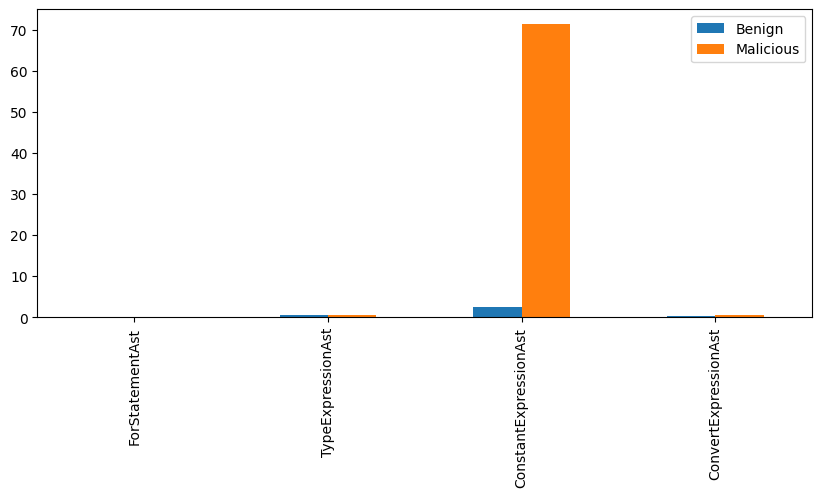

In [14]:
mnodes = []
mndist = []
for n in list(nodes):
    dist = get_node_dist(n)
    if dist[0] > dist[1] :
        mnodes.append(n)
        mndist.append([dist[1],dist[0]])
plot_dist(mndist,mnodes)




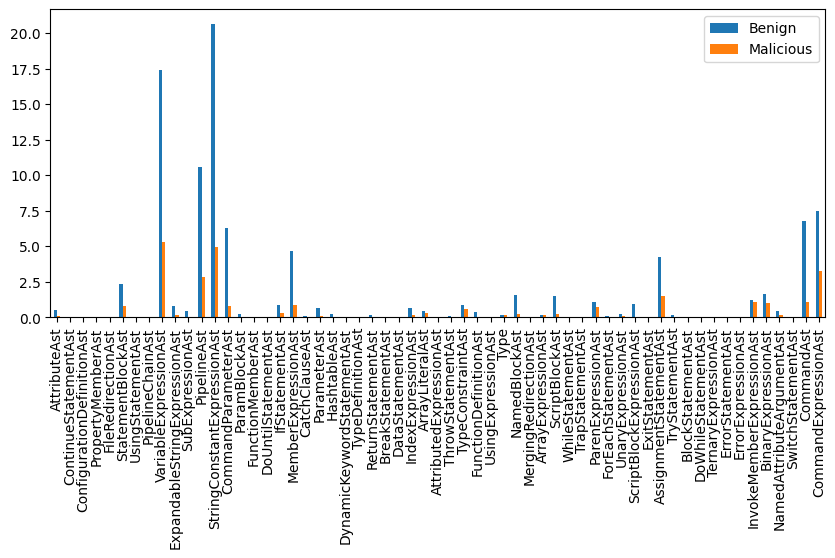

In [13]:

bnodes = []
bndist = []
for n in list(nodes):
    dist = get_node_dist(n)
    if dist[0] < dist[1] :
        bnodes.append(n)
        bndist.append([dist[1],dist[0]])
plot_dist(bndist,bnodes)

In [15]:
print(len(listdir('../mpsd/malicious_pure/')))
print(len(listdir('../mpsd/powershell_benign_dataset/')))


4202
4316


In [16]:
omnodes = []
for n in list(nodes):
    if malicious_count.get(n)!=None and benign_count.get(n)==None:
        omnodes.append(n)
omnodes    




[]

In [ ]:

obnodes = []
for n in list(nodes):
    if benign_count.get(n)!=None and malicious_count.get(n)==None:
        obnodes.append(n)
obnodes    

['AttributedExpressionAst',
 'UsingStatementAst',
 'TrapStatementAst',
 'ConfigurationDefinitionAst',
 'TypeDefinitionAst',
 'FunctionMemberAst',
 'UsingExpressionAst',
 'BlockStatementAst',
 'TernaryExpressionAst',
 'DataStatementAst',
 'PipelineChainAst',
 'DynamicKeywordStatementAst',
 'PropertyMemberAst']

In [17]:
malicious_count

{'ScriptBlockAst': 7354,
 'NamedBlockAst': 7432,
 'AssignmentStatementAst': 44613,
 'VariableExpressionAst': 156123,
 'CommandExpressionAst': 96025,
 'StringConstantExpressionAst': 145337,
 'PipelineAst': 83431,
 'CommandAst': 32180,
 'CommandParameterAst': 22998,
 'TypeExpressionAst': 18923,
 'ConvertExpressionAst': 13674,
 'TypeConstraintAst': 17099,
 'ArrayLiteralAst': 8618,
 'ConstantExpressionAst': 2095684,
 'IfStatementAst': 8550,
 'BinaryExpressionAst': 28804,
 'MemberExpressionAst': 26201,
 'StatementBlockAst': 23679,
 'InvokeMemberExpressionAst': 31450,
 'ForStatementAst': 4081,
 'ParenExpressionAst': 20976,
 'UnaryExpressionAst': 3331,
 'IndexExpressionAst': 4666,
 'Type': 4201,
 'ExpandableStringExpressionAst': 5941,
 'ScriptBlockExpressionAst': 1793,
 'ErrorStatementAst': 49,
 'SubExpressionAst': 1174,
 'WhileStatementAst': 227,
 'ExitStatementAst': 57,
 'FunctionDefinitionAst': 1359,
 'ParameterAst': 3797,
 'DoWhileStatementAst': 55,
 'ArrayExpressionAst': 5543,
 'ReturnSt

In [18]:
benign_count

{'ScriptBlockAst': 44675,
 'NamedBlockAst': 45847,
 'AssignmentStatementAst': 126890,
 'VariableExpressionAst': 516848,
 'CommandExpressionAst': 221748,
 'ArrayExpressionAst': 5729,
 'StatementBlockAst': 70459,
 'PipelineAst': 313091,
 'ConstantExpressionAst': 73958,
 'BinaryExpressionAst': 49419,
 'ConvertExpressionAst': 10912,
 'TypeConstraintAst': 26556,
 'StringConstantExpressionAst': 611986,
 'InvokeMemberExpressionAst': 36663,
 'TypeExpressionAst': 16959,
 'FileRedirectionAst': 1092,
 'FunctionDefinitionAst': 11447,
 'ParameterAst': 20285,
 'IfStatementAst': 24848,
 'MemberExpressionAst': 137550,
 'ArrayLiteralAst': 12756,
 'ExpandableStringExpressionAst': 23764,
 'SubExpressionAst': 12907,
 'ForEachStatementAst': 3426,
 'ParenExpressionAst': 32157,
 'ReturnStatementAst': 5336,
 'TryStatementAst': 4883,
 'CatchClauseAst': 2925,
 'CommandAst': 201407,
 'IndexExpressionAst': 20509,
 'Type': 4315,
 'CommandParameterAst': 187389,
 'HashtableAst': 7572,
 'ScriptBlockExpressionAst': 28

In [89]:
nodes_score = {}
# union of keys of benign and malicious
mtcount = get_total_count(malicious_count)
btcount = get_total_count(benign_count)
for key in set(malicious_count.keys()).union(set(benign_count.keys())):
    mc=0
    bc=0
    if key in malicious_count:
        mc = malicious_count[key]/mtcount
    if key in benign_count:
        bc = benign_count[key]/btcount
    nodes_score[key] = mc/bc

In [97]:
malicious_count["ForStatementAst"]/mtcount
benign_count["ForStatementAst"]/btcount

0.00019421580815524316

In [90]:
import os
from utils import *

In [91]:
def file_score(ast_filepath):
    score = 0
    data = read_csv(ast_filepath)
    data = data[1:]
    for row in data:
        score = score + nodes_score[row[1]]
    return score/len(data)


In [72]:
benign_scores = []
for file in os.listdir('../ast/benign'):
    score = file_score(os.path.join('../ast/benign',file))
    benign_scores.append(score)


In [73]:
malicious_scores = []
for file in os.listdir('../ast/malicious'):
    score = file_score(os.path.join('../ast/malicious',file))
    malicious_scores.append(score)

In [82]:
count = 0
for score in benign_scores:
    if score > 0.1:
        count = count + 1
count

4316

In [83]:
count = 0
for score in malicious_scores:
    if score > 0.1:
        count = count + 1
count

4202

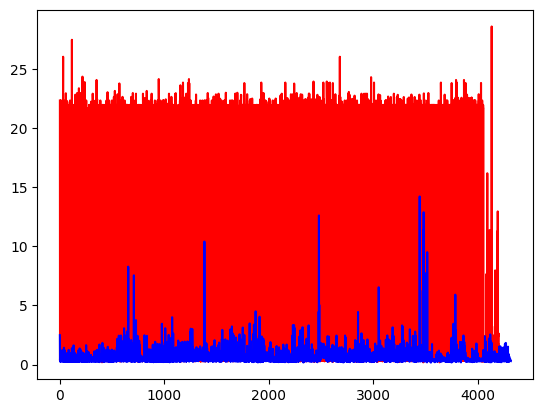

In [88]:
import matplotlib.pyplot as plt
plt.plot(malicious_scores,color='red')
plt.plot(benign_scores,color='blue')